In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
sales_df = pd.read_csv('../Data/sales_data.csv')
sales_df.head()

,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region
0,ORD100000,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,1,114.00,CUST7251,North
1,ORD100001,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,4,51.96,CUST5685,East
2,ORD100002,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,2,25.98,CUST6432,South
3,ORD100003,2022-08-11,Mens Casual Slim Fit,men's clothing,15.99,3,47.97,CUST2588,East
4,ORD100004,2022-08-11,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,electronics,599.00,4,2396.00,CUST7231,South


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99594 entries, 0 to 99593
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     99594 non-null  object 
 1   Order Date   99594 non-null  object 
 2   Product      99594 non-null  object 
 3   Category     99594 non-null  object 
 4   Price        99594 non-null  float64
 5   Quantity     99594 non-null  int64  
 6   Total Sales  99594 non-null  float64
 7   Customer ID  99594 non-null  object 
 8   Region       99594 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.8+ MB


In [4]:
sales_df.describe

<bound method NDFrame.describe of         Order ID  Order Date  \
0      ORD100000  2022-08-11   
1      ORD100001  2022-08-11   
2      ORD100002  2022-08-11   
3      ORD100003  2022-08-11   
4      ORD100004  2022-08-11   
...          ...         ...   
99589  ORD199589  2025-08-09   
99590  ORD199590  2025-08-09   
99591  ORD199591  2025-08-09   
99592  ORD199592  2025-08-09   
99593  ORD199593  2025-08-09   

                                                 Product          Category  \
0      WD 4TB Gaming Drive Works with Playstation 4 P...       electronics   
1             DANVOUY Womens T Shirt Casual Cotton Short  women's clothing   
2             DANVOUY Womens T Shirt Casual Cotton Short  women's clothing   
3                                   Mens Casual Slim Fit    men's clothing   
4      Acer SB220Q bi 21.5 inches Full HD (1920 x 108...       electronics   
...                                                  ...               ...   
99589                       Solid G

In [5]:
sales_df.isnull().sum()

Order ID       0
Order Date     0
Product        0
Category       0
Price          0
Quantity       0
Total Sales    0
Customer ID    0
Region         0
dtype: int64

In [6]:
sales_df.head()

,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region
0,ORD100000,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,1,114.00,CUST7251,North
1,ORD100001,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,4,51.96,CUST5685,East
2,ORD100002,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,2,25.98,CUST6432,South
3,ORD100003,2022-08-11,Mens Casual Slim Fit,men's clothing,15.99,3,47.97,CUST2588,East
4,ORD100004,2022-08-11,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,electronics,599.00,4,2396.00,CUST7231,South


In [7]:
# checking for negetive values in the sales column
sales_df[(sales_df['Price'] < 0) & (sales_df['Quantity'] < 0) & (sales_df['Total Sales'] < 0)]

,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region


In [8]:
sales_df['Category'].value_counts()

Category
women's clothing    30055
electronics         29802
men's clothing      19904
jewelery            19833
Name: count, dtype: int64

### Performing EDA

In [9]:
print("Total Sales:", sales_df['Total Sales'].sum())
print("Total Orders:", sales_df['Order ID'].nunique())
print("Total Customers:", sales_df['Customer ID'].nunique())
print("Sales Period:", sales_df['Order Date'].min(), "to", sales_df['Order Date'].max())
# print("Total Sales:", sales_df['Total Sales'].sum())

Total Sales: 48436072.64
Total Orders: 99594
Total Customers: 9000
Sales Period: 2022-08-11 to 2025-08-09


In [10]:
# I need to convert the data type of 'Order Date' to datetime 
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%Y-%m-%d')
# then I need to divide the year, month and day columns separate
sales_df['Order_day'] = sales_df['Order Date'].dt.day
sales_df['Order_month'] = sales_df['Order Date'].dt.month
sales_df['Order_year'] = sales_df['Order Date'].dt.year

In [11]:
sales_df.head()

,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region,Order_day,Order_month,Order_year
0,ORD100000,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,1,114.00,CUST7251,North,11,8,2022
1,ORD100001,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,4,51.96,CUST5685,East,11,8,2022
2,ORD100002,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,2,25.98,CUST6432,South,11,8,2022
3,ORD100003,2022-08-11,Mens Casual Slim Fit,men's clothing,15.99,3,47.97,CUST2588,East,11,8,2022
4,ORD100004,2022-08-11,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,electronics,599.00,4,2396.00,CUST7231,South,11,8,2022


In [12]:
# sales_df.drop(['Order Date'], axis=1, inplace=True) --> this is already done
sales_df.head()

,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region,Order_day,Order_month,Order_year
0,ORD100000,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,1,114.00,CUST7251,North,11,8,2022
1,ORD100001,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,4,51.96,CUST5685,East,11,8,2022
2,ORD100002,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,2,25.98,CUST6432,South,11,8,2022
3,ORD100003,2022-08-11,Mens Casual Slim Fit,men's clothing,15.99,3,47.97,CUST2588,East,11,8,2022
4,ORD100004,2022-08-11,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,electronics,599.00,4,2396.00,CUST7231,South,11,8,2022


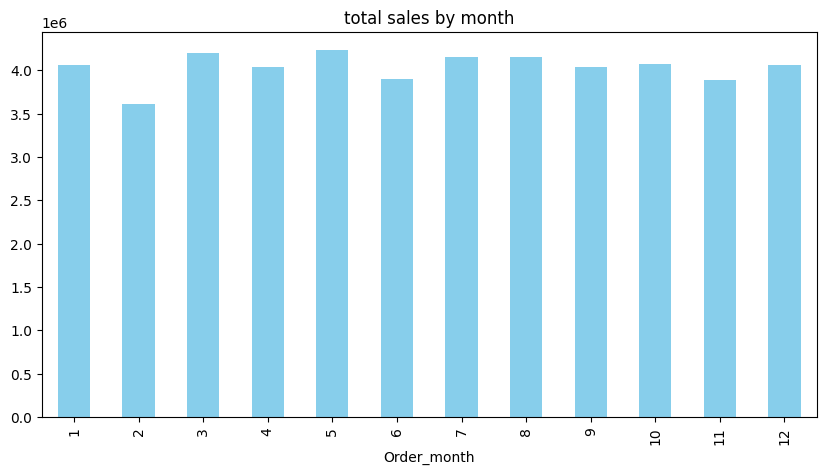

In [13]:
# monthly sales data visualization 
sales_by_month = sales_df.groupby('Order_month')['Total Sales'].sum() # after selecting and doing summation you plot 
sales_by_month.plot(kind='bar', title= 'total sales by month', figsize=(10, 5), color='skyblue')
plt.show()


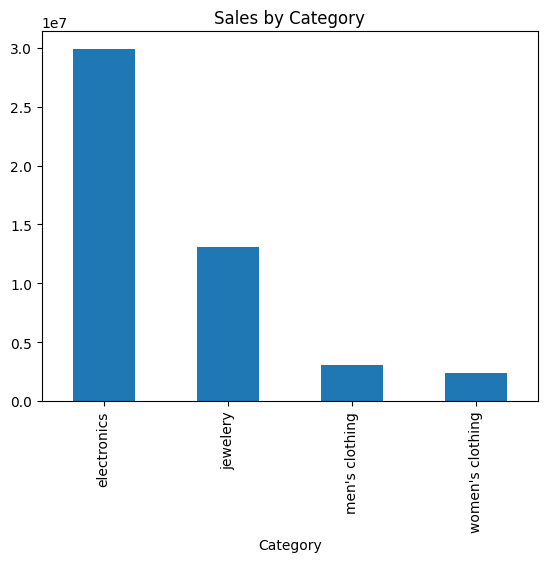

In [14]:
# Sales by Category
sales_df.groupby('Category')['Total Sales'].sum().plot(kind='bar', title='Sales by Category')
plt.show()

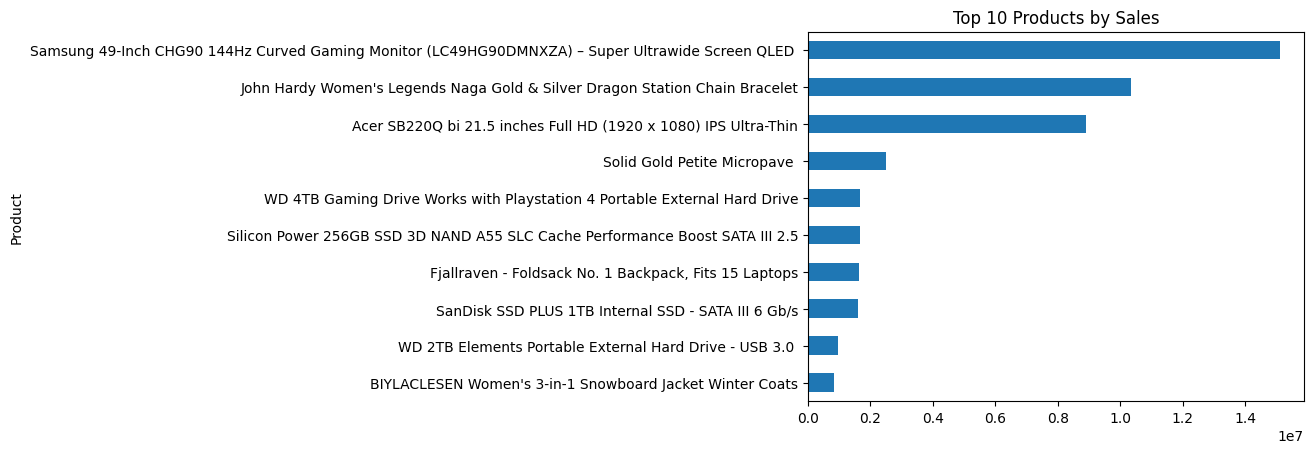

In [15]:
# Top 10 products
sales_df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Products by Sales')
plt.gca().invert_yaxis()
plt.show()

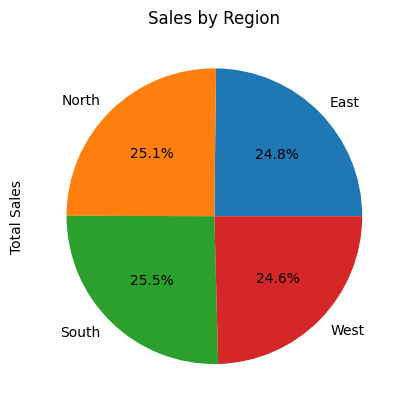

In [16]:

# Sales by Region
sales_df.groupby('Region')['Total Sales'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')
plt.show()


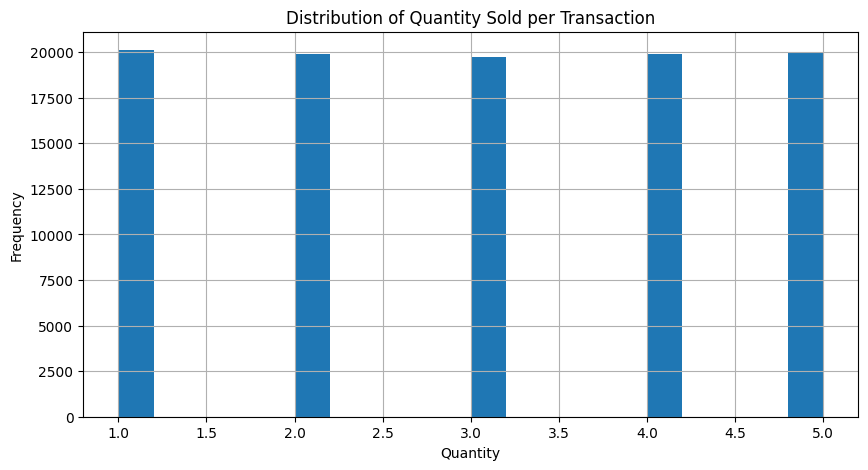

In [17]:
sales_df['Quantity'].hist(bins=20, figsize=(10,5))
plt.title('Distribution of Quantity Sold per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

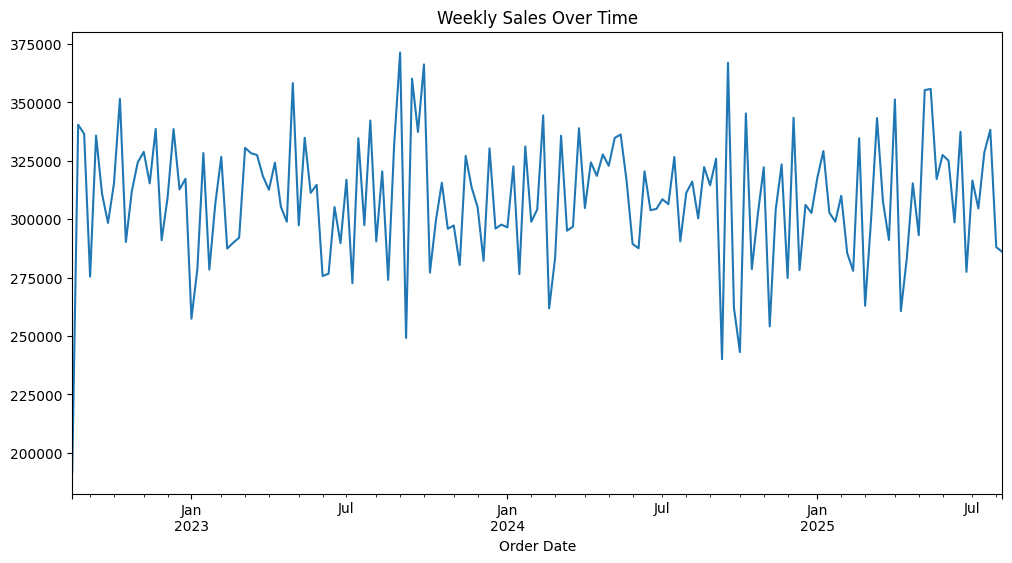

In [18]:
weekly_sales = sales_df.resample('W', on='Order Date')['Total Sales'].sum()
weekly_sales.plot(figsize=(12,6), title='Weekly Sales Over Time')
plt.show()

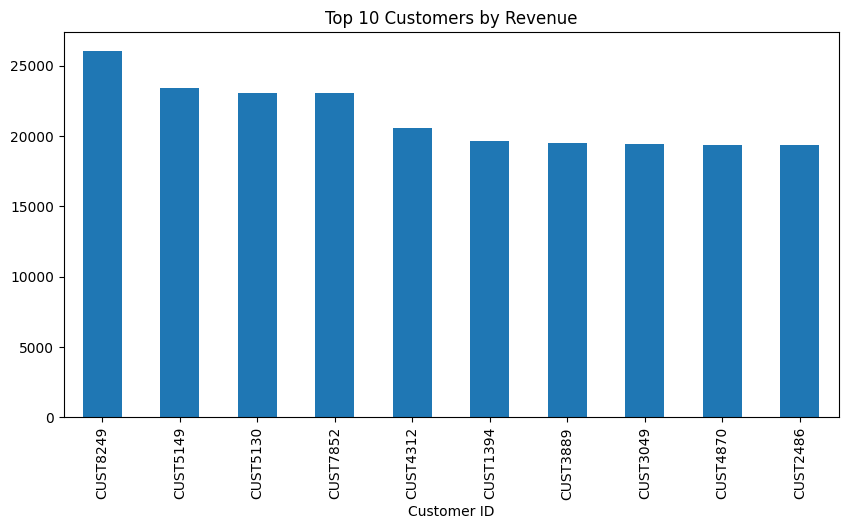

Average Order Value: $ 486.34


In [19]:
top_customers = sales_df.groupby('Customer ID')['Total Sales'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(10,5), title="Top 10 Customers by Revenue")
plt.show()

# Average order value
avg_order_value = sales_df['Total Sales'].mean()
print("Average Order Value: $", round(avg_order_value, 2))

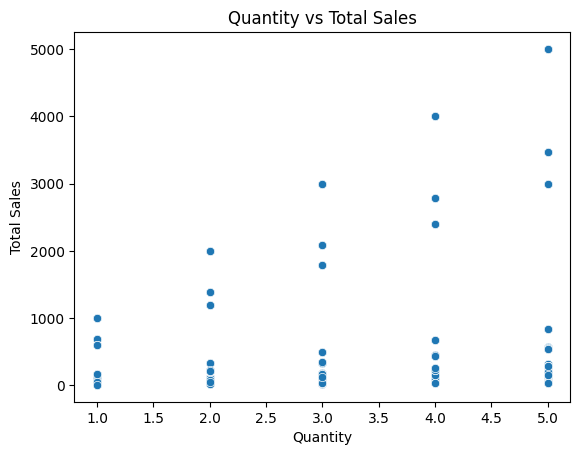

In [20]:
sns.scatterplot(data=sales_df, x="Quantity", y="Total Sales")
plt.title("Quantity vs Total Sales")
plt.show()

### preparing the data for models (Feature Engineering)

In [21]:
sales_df['Avg_price_perO'] = sales_df['Total Sales'].sum() / sales_df['Quantity']
sales_df.head(10)


,Order ID,Order Date,Product,Category,Price,Quantity,Total Sales,Customer ID,Region,Order_day,Order_month,Order_year,Avg_price_perO
0,ORD100000,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,1,114.00,CUST7251,North,11,8,2022,4.843607e+07
1,ORD100001,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,4,51.96,CUST5685,East,11,8,2022,1.210902e+07
2,ORD100002,2022-08-11,DANVOUY Womens T Shirt Casual Cotton Short,women's clothing,12.99,2,25.98,CUST6432,South,11,8,2022,2.421804e+07
3,ORD100003,2022-08-11,Mens Casual Slim Fit,men's clothing,15.99,3,47.97,CUST2588,East,11,8,2022,1.614536e+07
4,ORD100004,2022-08-11,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,electronics,599.00,4,2396.00,CUST7231,South,11,8,2022,1.210902e+07
5,ORD100005,2022-08-11,Pierced Owl Rose Gold Plated Stainless Steel D...,jewelery,10.99,2,21.98,CUST2311,South,11,8,2022,2.421804e+07
6,ORD100006,2022-08-11,WD 2TB Elements Portable External Hard Drive -...,electronics,64.00,3,192.00,CUST6659,East,11,8,2022,1.614536e+07
7,ORD100007,2022-08-11,BIYLACLESEN Women's 3-in-1 Snowboard Jacket Wi...,women's clothing,56.99,4,227.96,CUST1109,South,11,8,2022,1.210902e+07
8,ORD100008,2022-08-11,WD 2TB Elements Portable External Hard Drive -...,electronics,64.00,3,192.00,CUST6182,North,11,8,2022,1.614536e+07
9,ORD100009,2022-08-11,WD 4TB Gaming Drive Works with Playstation 4 P...,electronics,114.00,4,456.00,CUST9010,North,11,8,2022,1.210902e+07


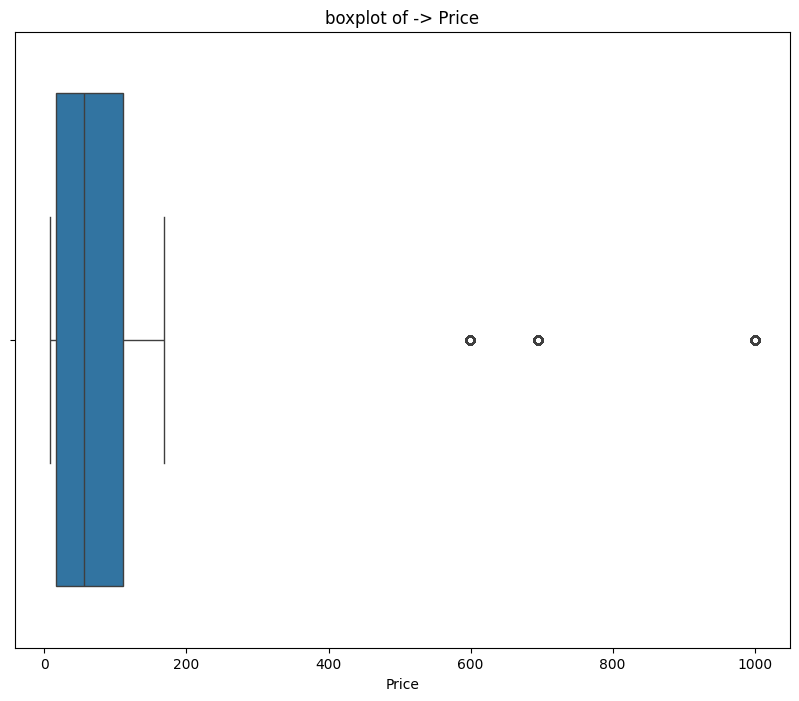

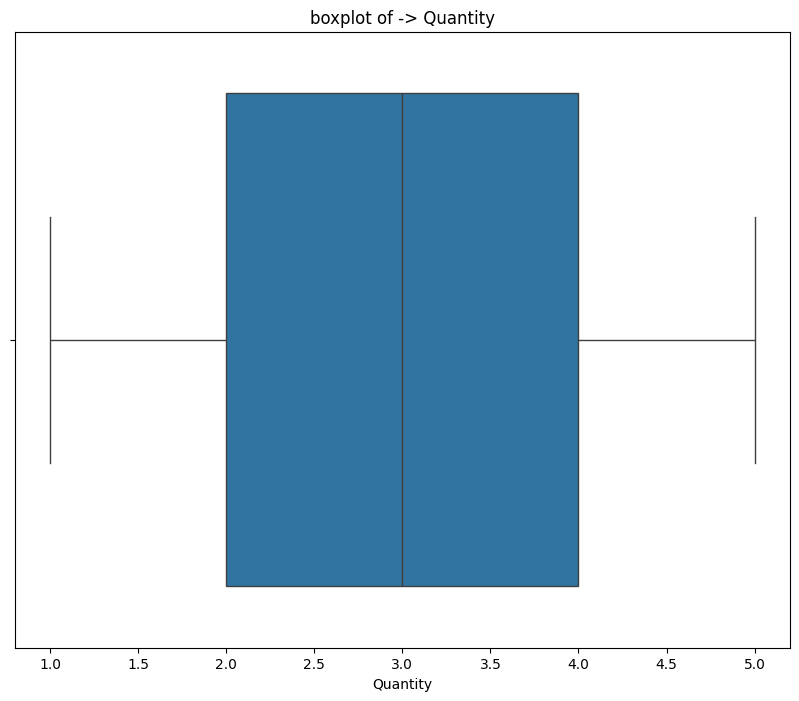

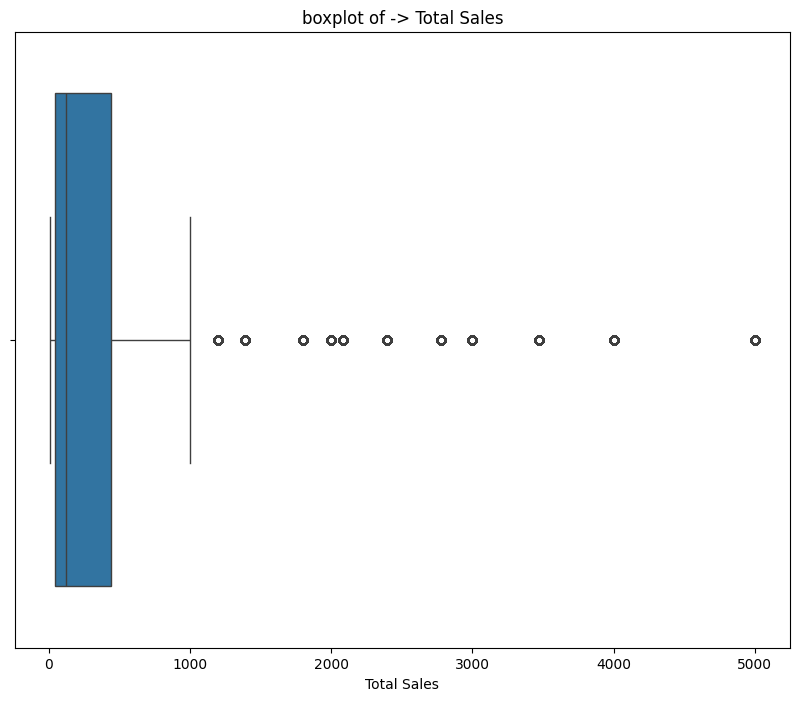

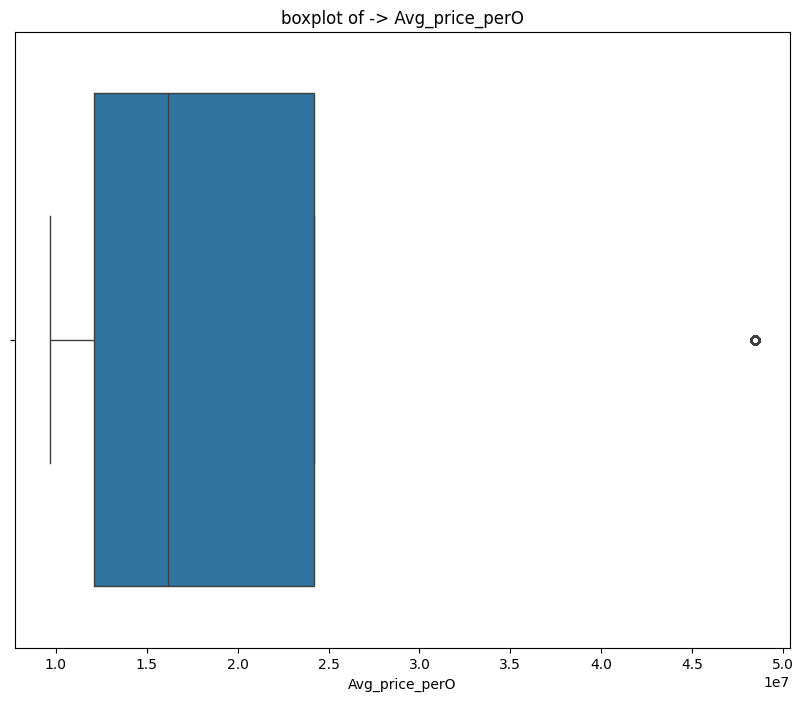

In [24]:
# need to check the outliers 
numerical_cols = ['Price', 'Quantity', 'Total Sales', 'Avg_price_perO']
for cols in numerical_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=sales_df[cols])
    plt.title(f"boxplot of -> {cols}")
    plt.show()

In [30]:


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)   # 25th percentile
    Q3 = data[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                      # Interquartile range

    # Define acceptable lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    print(f"{column}: Removed {len(data) - len(cleaned_data)} outliers")
    return cleaned_data

# Apply to your numeric columns
df_clean = sales_df.copy()
for col in numerical_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Original shape:", sales_df.shape)
print("After outlier removal:", df_clean.shape)

columns_to_check = ['Total Sales', 'Price']

df_clean = sales_df.copy()
for col in columns_to_check:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Shape after cleaning Total Sales and Price:", df_clean.shape)

Price: Removed 14992 outliers
Quantity: Removed 0 outliers
Total Sales: Removed 5987 outliers
Avg_price_perO: Removed 17048 outliers
Original shape: (99594, 13)
After outlier removal: (61567, 13)
Total Sales: Removed 11928 outliers
Price: Removed 3064 outliers
Shape after cleaning Total Sales and Price: (84602, 13)


In [31]:
powerbi_sales_data = df_clean.copy()
powerbi_data = powerbi_sales_data[['Order ID', 'Order Date', 'Order_day', 'Order_month', 'Order_year',
                             'Product', 'Category', 'Price', 'Quantity', 'Total Sales',
                             'Avg_price_perO', 'Customer ID', 'Region']]

# Export to CSV for Power BI
powerbi_data.to_csv("sales_data_powerbi.csv", index=False)
print("Power BI CSV file created: sales_data_powerbi.csv")

Power BI CSV file created: sales_data_powerbi.csv


### I dont need the scalling part down below which I will remove by the way

In [22]:
# # encoding the columns/features to feed to the model 
# # using one-hot encoding becase the data that I selected has no order (nominal data) 
# # like, red, green , blue, etc has no order you can write it in any order 
# sales_df = pd.get_dummies(sales_df, columns=['Category', 'Region'], drop_first=True)

# # but while using label we need to keep the ordinal data in mind 
# # as one, two, three
# # or it can be like, order id which is in order so that is very important 
# le = LabelEncoder()
# sales_df['customer_id_encoded'] = le.fit_transform(sales_df['Customer ID'])

In [23]:
# # now we need to scale the data 
# # and we scale numerical columns only, so that is imp 
# sc = StandardScaler()
# sales_df[['Price', 'Quantity', 'Total Sales', 'Avg_price_perO']] = sc.fit_transform(sales_df[['Price', 'Quantity', 'Total Sales', 'Avg_price_perO']])
# sales_df.head(10)